In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


목표
- 학생 성적을 예측하는 회귀 모델을 만들어보자
- keras를 이용해 신경망을 구성하는 방법을 연습해보자


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# 데이터 프레임에서 모든 커럼들을 표시(None: 무제한)
pd.set_option("display.max_columns", None)

In [ ]:
# ' 으로 구분된 student-mat 파일을 로드
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/student-mat.csv", delimiter=";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [ ]:
data.shape

(395, 33)

문제, 답 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 문제는 studytime 정답은 G3로 설정해보자
X = data['studytime']
y = data['G3']

In [ ]:
# 학습, 평가, 문제, 정답 데이터를 자동으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state = 3)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(296,)
(99,)
(296,)
(99,)


신경망 모델 만들기
- 1. 신경망 구조 설계
- 2. 신경망 학습/평가 방법 설정
- 3. 학습 및 학습과정 시각화
- 4. 모델 평가

In [ ]:
# Sequential: 신경망 뼈대를 구축
from tensorflow.keras import Sequential
# InputLayer: 신경망의 입력층을 생성, Dense : 신경망 층 (뉴런들의 묶음)을 구성해주는 모듈            
from tensorflow.keras.layers import InputLayer, Dense

In [ ]:
# 1. 신경망 구조 설계
model = Sequential()

# 입력층 설정
# 입력 데이터의 특성 형태를 설정 (1개의 특성, 1차원 데이터) 이미지: 2차원
model.add(InputLayer(input_shape=(1,)))

# 출력층 설정
# Dense : 하나의 층을 쌓아주는 명령, () 안 숫자는 하나의 층에 생성해줄 총 뉴런의 개수
model.add(Dense(1))

In [ ]:
# 2.신경망 학습/평가 방법 설정
model.compile(loss = 'mse',   # 손실 함수(비용함수) : MSE
              optimizer='SGD' # 최적화 함수 : 경사하강법 설정 (확률적)       
              )

In [ ]:
# 3. 학습 및 학습과정 시각화
h = model.fit(X_train, y_train,
              epochs=100) # 학습 횟수를 설정

# compile을 재실행 시키기 않고 fit을 계속 실행하게 되면 기존 학습횟수에 추가로 학습이 이루어지게됨

Epoch 1/100
10/10 [==============================] - 1s 1ms/step - loss: 58.8908
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 30.3961
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 30.3596
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 27.9442
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 26.5881
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 24.7922
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 30.3152
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 24.9257
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 28.2399
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 23.2618
Epoch 11/100
10/10 [==============================] - 0s 1ms/step - loss: 26.3021
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 26.3642
Epoch 13/100
10/10 [=====

In [ ]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

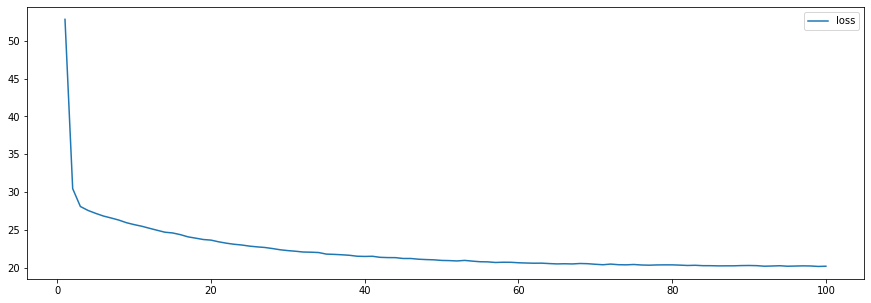

In [ ]:
plt.figure(figsize=(15,5))
# 라인차트를 생성
plt.plot(range(1,101),          # epochs 범위 설정
         h.history['loss'],     # history: 모델 학습시 나타나는 결과값을 불러오는 명령
         label='loss')          # label: 해당 값에 명칭을 붙여줌
plt.legend()
plt.show

- 초반에는 빠르게 loss(MSE) 값이 떨어지고 있다.
- 경사하강법 초반에는 가중치 (w), 절편(B)값이 임의 값으로 설정되어 있기 때문에 몇번만 최적화(학습)를 시켜도 loss가 빠르게 줄어드는 것을 볼 수 있다.
- 중후반부터는 학습이 더 이상 일어나지 않고 있다.
(더해도 안좋음)



In [ ]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 23.0552


23.055150985717773

입력 특성이 2개인 모델 만들기(직접 실습해보자~!)
- 문제 (입력 특성 2개: studytime, traveltime)
- 정답(G3)
- 뉴런개수는 1개

In [ ]:
X1 = data[["traveltime","studytime"]]
y1 = data['G3']

In [ ]:
X1

,traveltime,studytime
0,2,2
1,1,2
2,1,2
3,1,3
4,1,2
...,...,...
390,1,2
391,2,1
392,1,1
393,3,1


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, 
                                                    random_state = 3)

In [ ]:
# 1. 신경망 구조 설계
model1 = Sequential()

# 입력층 설정
# 입력 데이터의 특성 형태를 설정 (2개의 특성, 1차원 데이터) 이미지: 2차원
model1.add(InputLayer(input_shape=(2,)))

# 출력층 설정
# Dense : 하나의 층을 쌓아주는 명령, () 안 숫자는 하나의 층에 생성해줄 총 뉴런의 개수
model1.add(Dense(1))

# 2.신경망 학습/평가 방법 설정
model1.compile(loss = 'mse',   # 손실 함수(비용함수) : MSE
              optimizer='SGD' # 최적화 함수 : 경사하강법 설정 (확률적)       
              )

# 3. 학습 및 학습과정 시각화
h1 = model1.fit(X_train1, y_train1,
              epochs=100) # 학습 횟수를 설정

# compile을 재실행 시키기 않고 fit을 계속 실행하게 되면 기존 학습횟수에 추가로 학습이 이루어지게됨

model1.evaluate(X_test1, y_test1)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 87.2196
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 26.6467
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 28.6867
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 26.6607
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 26.9293
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 26.8700
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 24.4196
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 25.2011
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 23.5641
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 26.7855
Epoch 11/100
10/10 [==============================] - 0s 1ms/step - loss: 22.9482
Epoch 12/100
10/10 [==============================] - 0s 1ms/step - loss: 24.3451
Epoch 13/100
10/10 [=====

23.4848575592041

<function matplotlib.pyplot.show>

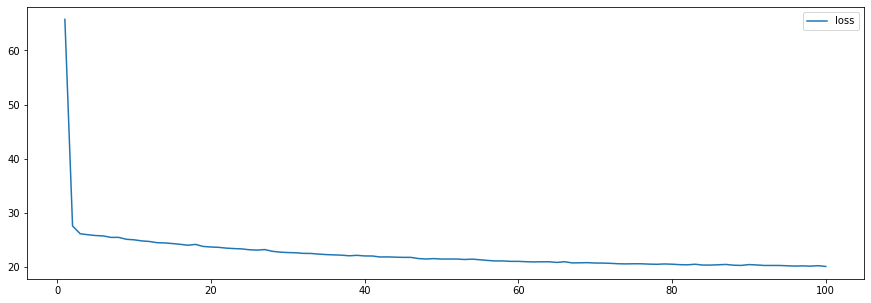

In [ ]:
plt.figure(figsize=(15,5))
# 라인차트를 생성
plt.plot(range(1,101),          # epochs 범위 설정
         h1.history['loss'],     # history: 모델 학습시 나타나는 결과값을 불러오는 명령
         label='loss')          # label: 해당 값에 명칭을 붙여줌
plt.legend()
plt.show